# Baseball Case Study
Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)

# importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_baseball=pd.read_csv(r'C:\Users\Rohan\OneDrive\Desktop\baseball.csv')

In [5]:
df_baseball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [6]:
df_baseball.info

<bound method DataFrame.info of       W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  2

In [7]:
df_baseball.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [8]:
df_baseball.shape

(30, 17)

In [9]:
df_baseball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [10]:
df_baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


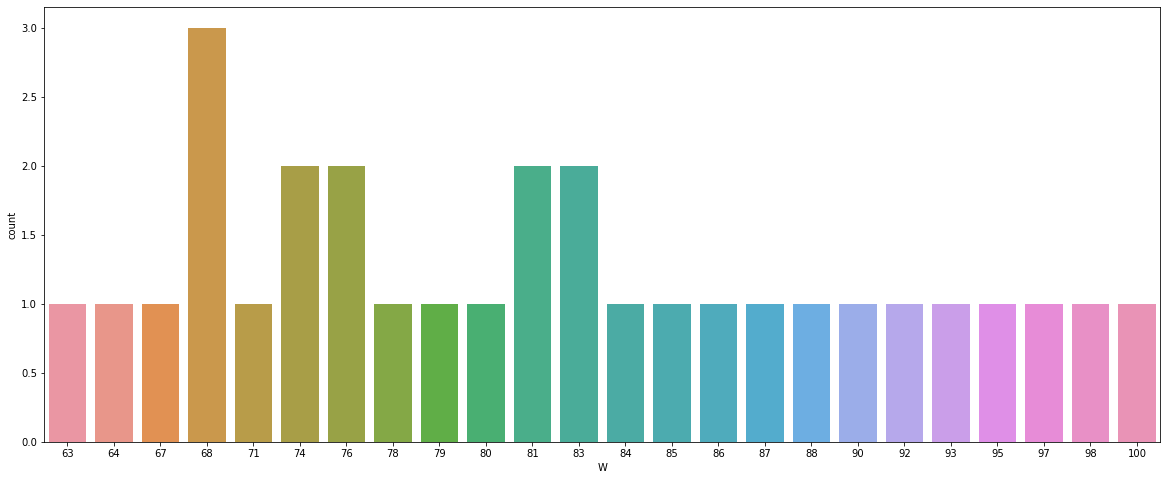

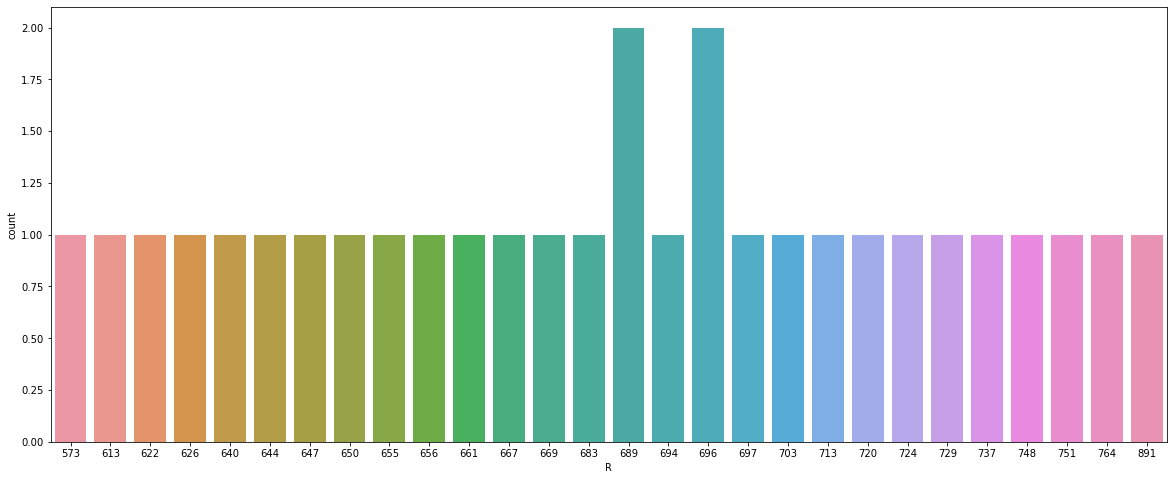

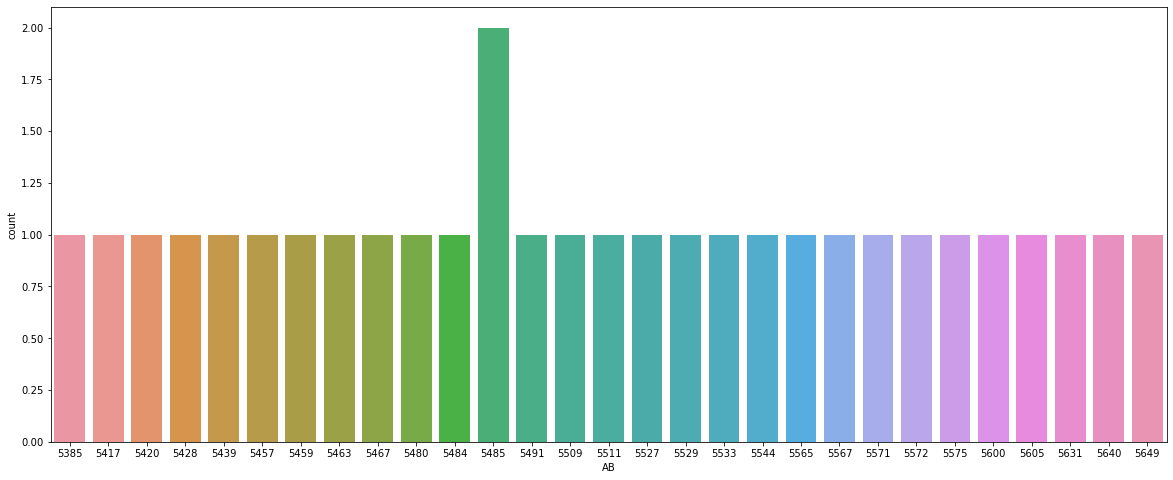

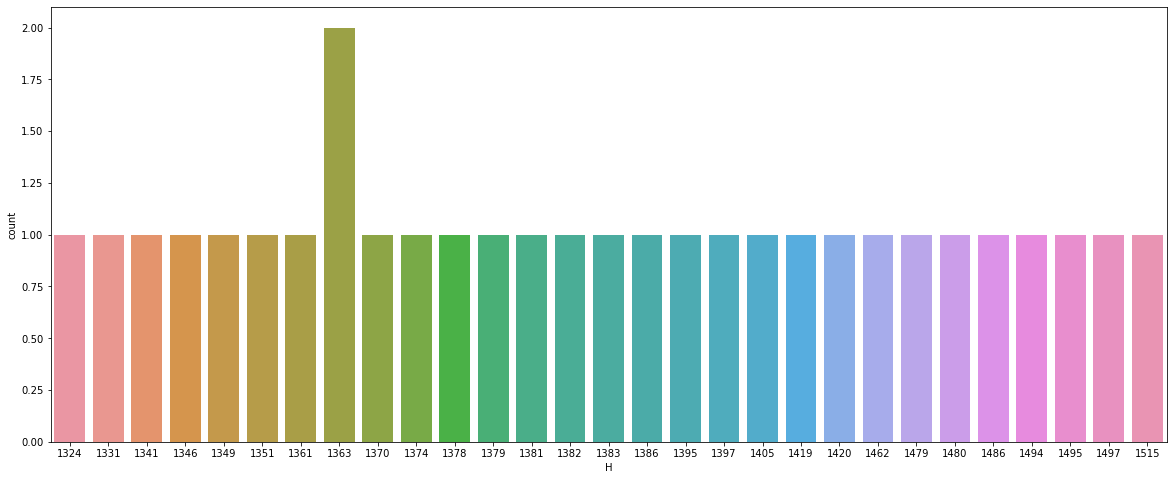

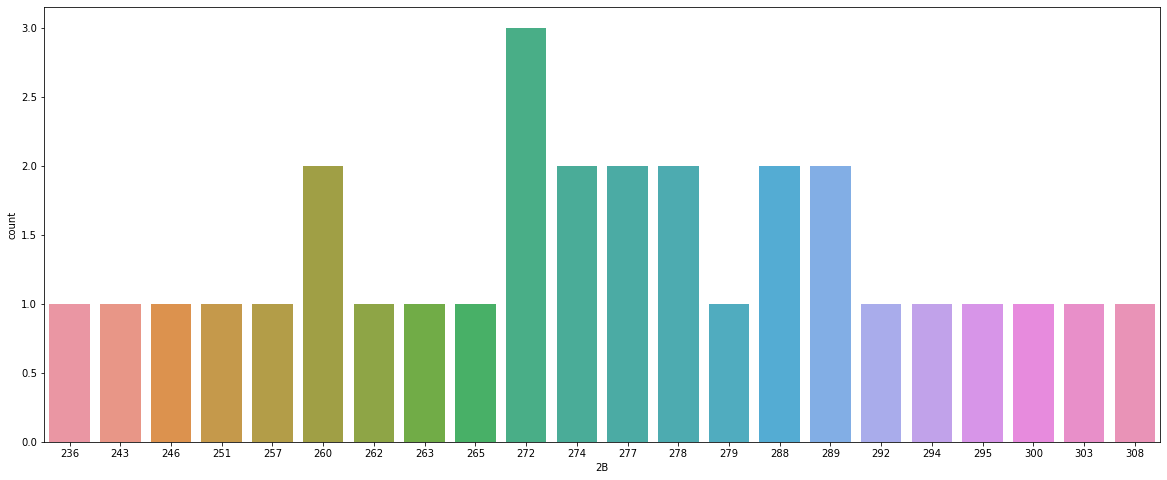

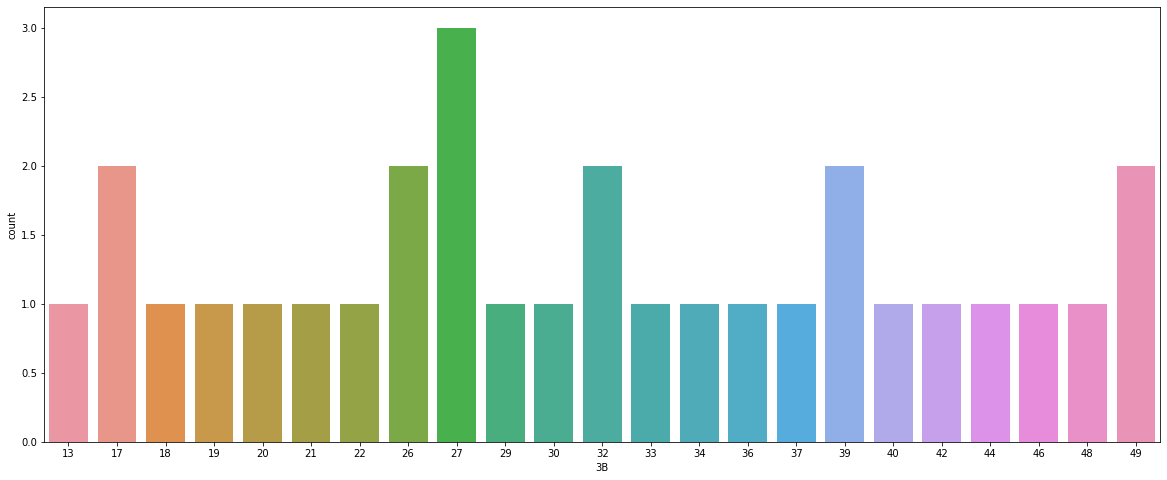

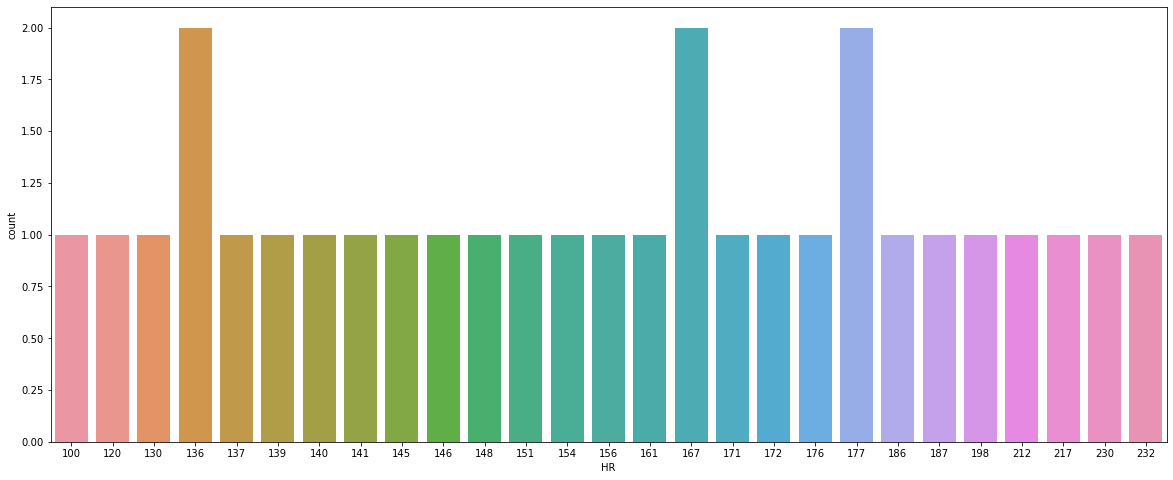

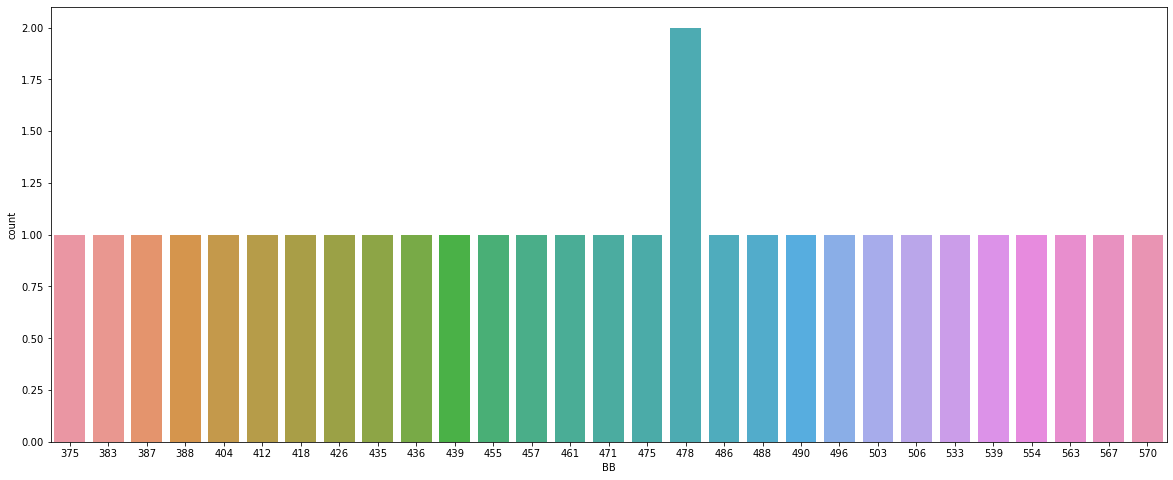

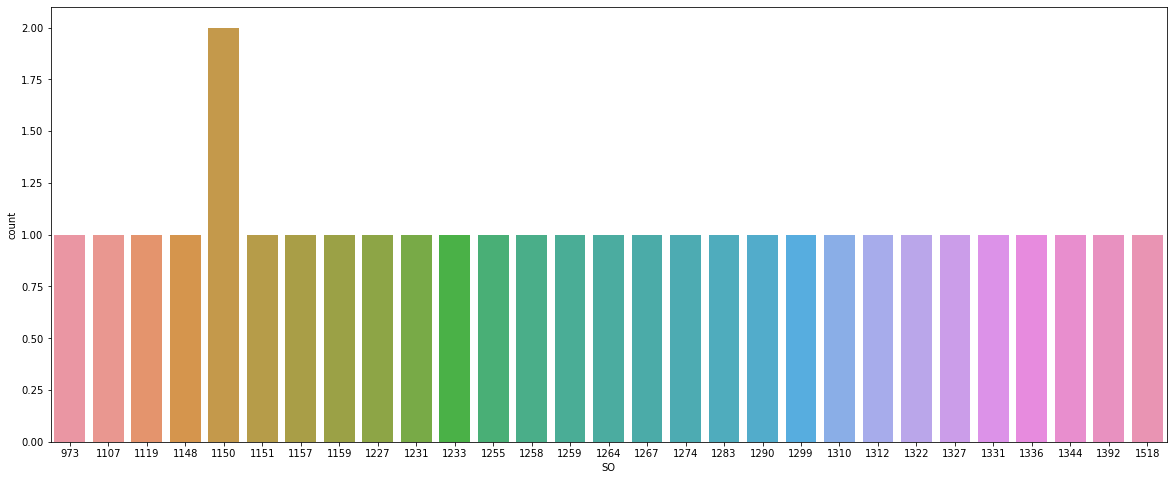

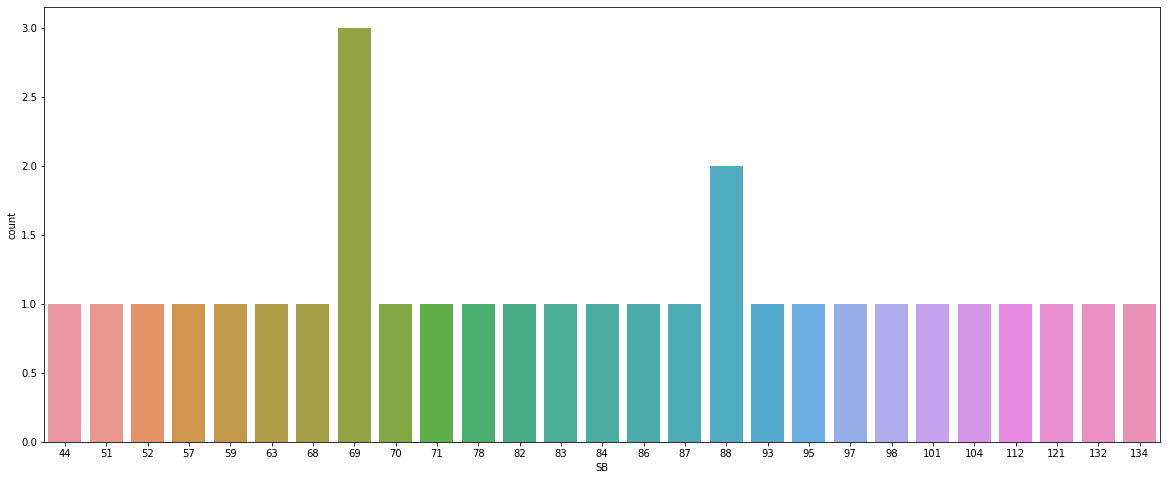

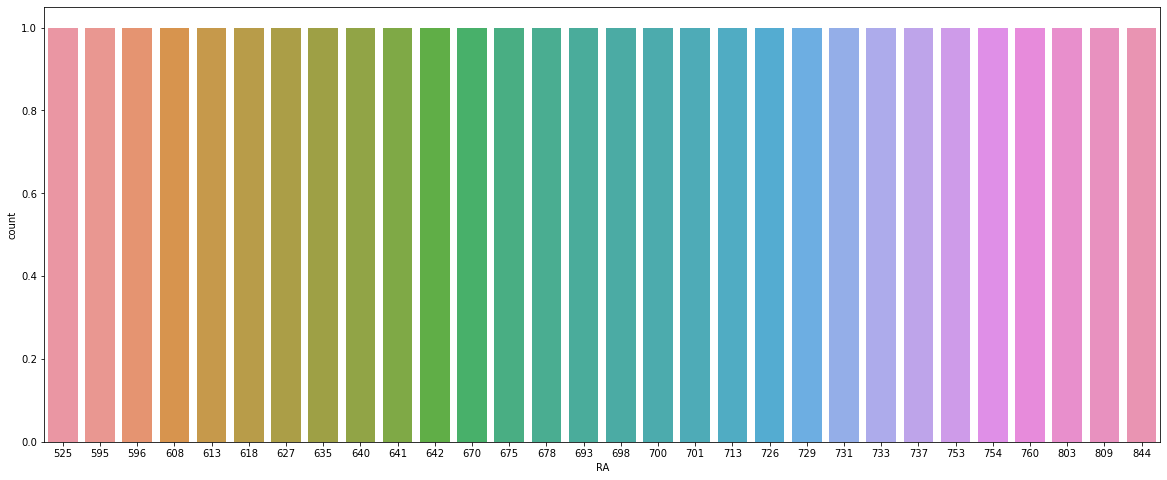

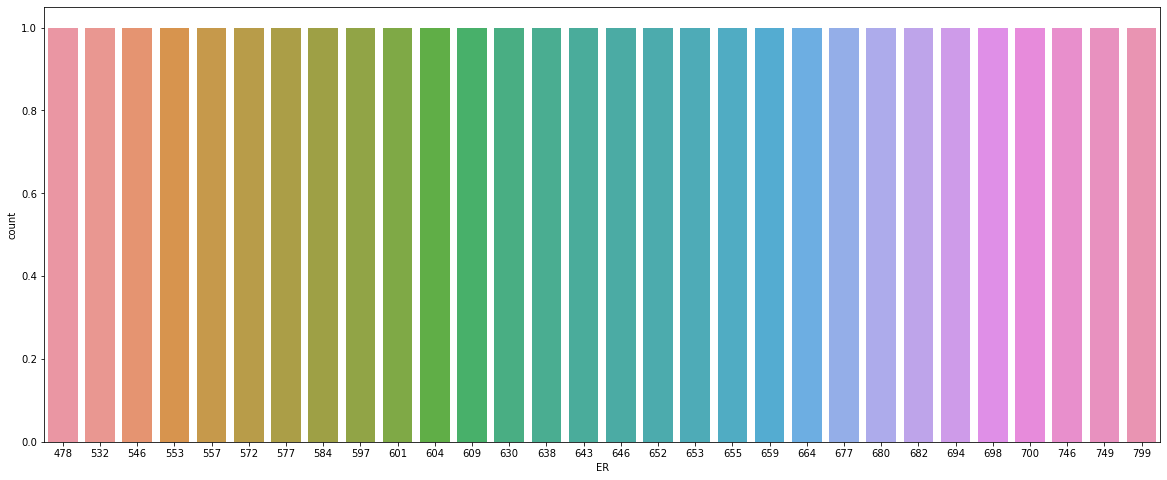

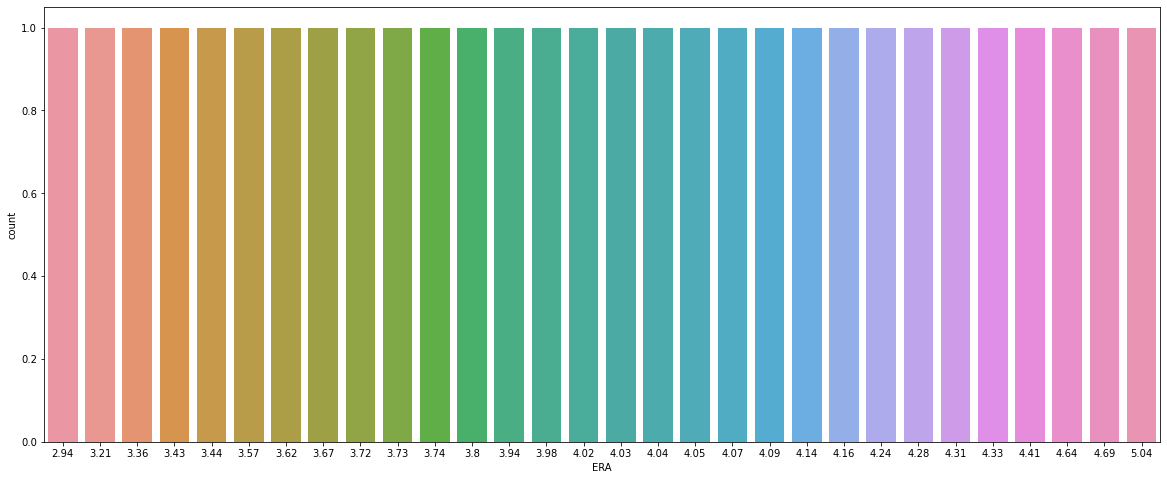

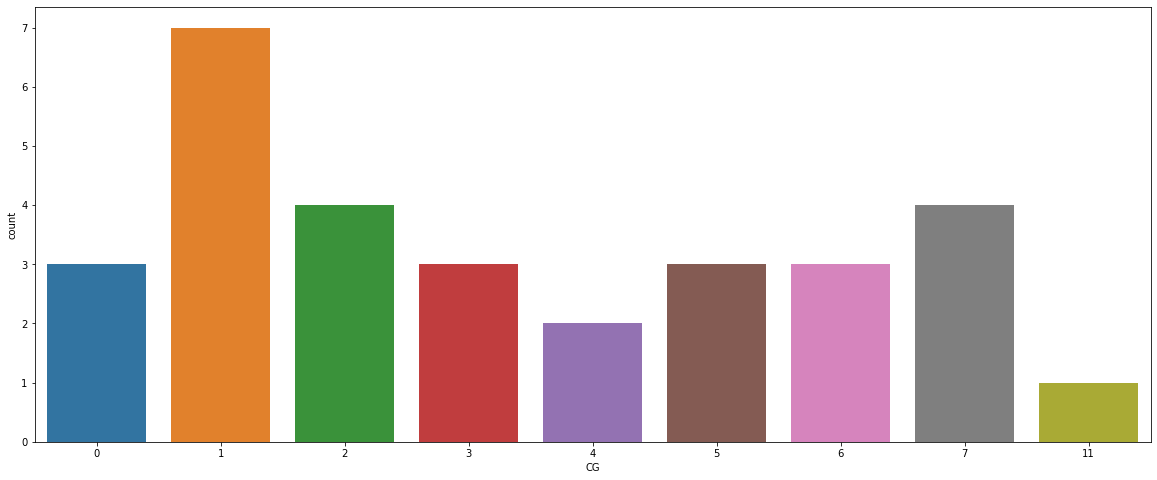

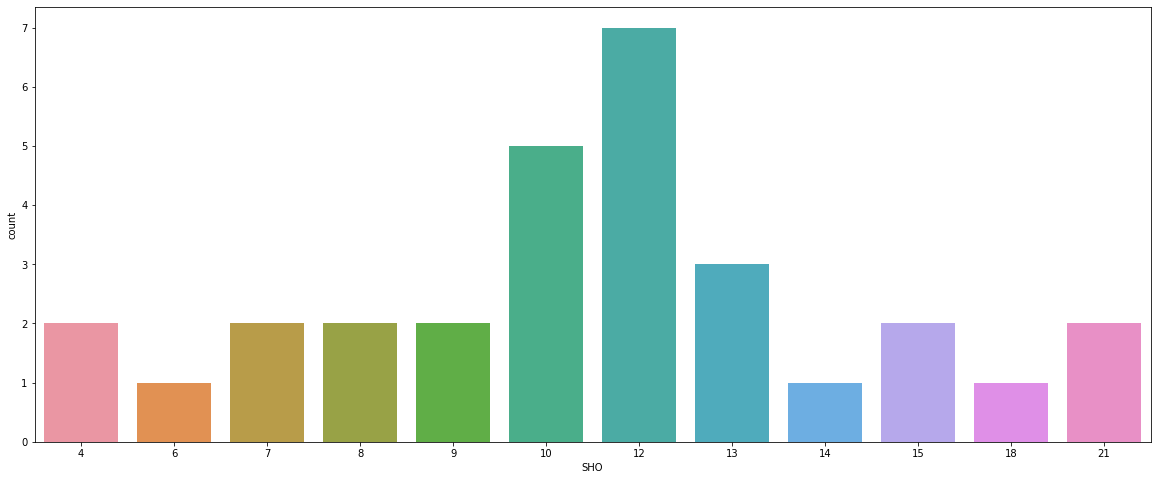

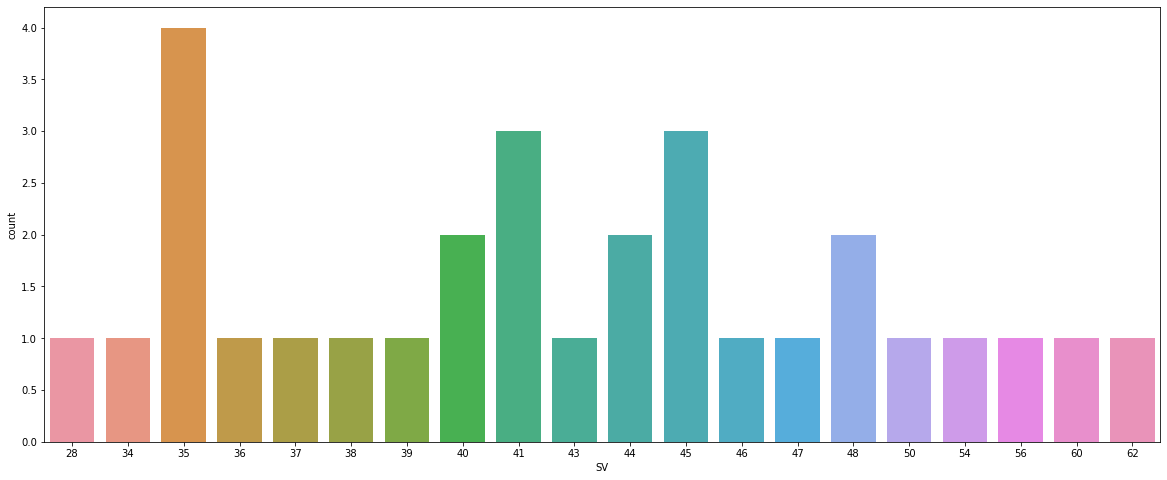

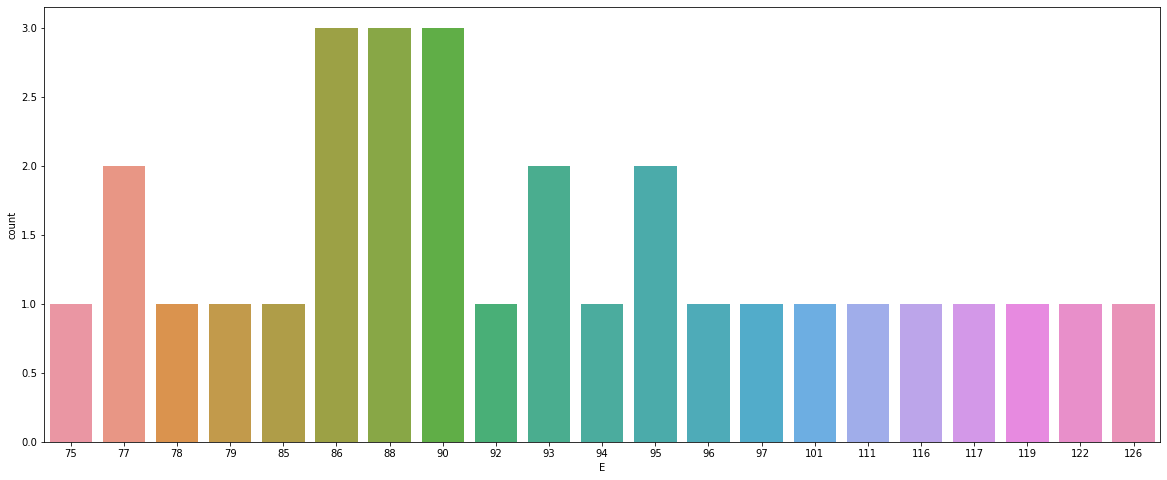

In [11]:
list=['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']
for i in list:
    plt.subplots(figsize=(20,8))
    sns.countplot(i,data=df_baseball)
    plt.show()

W         AxesSubplot(0.125,0.826831;0.227941x0.053169)
R      AxesSubplot(0.398529,0.826831;0.227941x0.053169)
AB     AxesSubplot(0.672059,0.826831;0.227941x0.053169)
H         AxesSubplot(0.125,0.763028;0.227941x0.053169)
2B     AxesSubplot(0.398529,0.763028;0.227941x0.053169)
3B     AxesSubplot(0.672059,0.763028;0.227941x0.053169)
HR        AxesSubplot(0.125,0.699225;0.227941x0.053169)
BB     AxesSubplot(0.398529,0.699225;0.227941x0.053169)
SO     AxesSubplot(0.672059,0.699225;0.227941x0.053169)
SB        AxesSubplot(0.125,0.635423;0.227941x0.053169)
RA     AxesSubplot(0.398529,0.635423;0.227941x0.053169)
ER     AxesSubplot(0.672059,0.635423;0.227941x0.053169)
ERA        AxesSubplot(0.125,0.57162;0.227941x0.053169)
CG      AxesSubplot(0.398529,0.57162;0.227941x0.053169)
SHO     AxesSubplot(0.672059,0.57162;0.227941x0.053169)
SV        AxesSubplot(0.125,0.507817;0.227941x0.053169)
E      AxesSubplot(0.398529,0.507817;0.227941x0.053169)
dtype: object

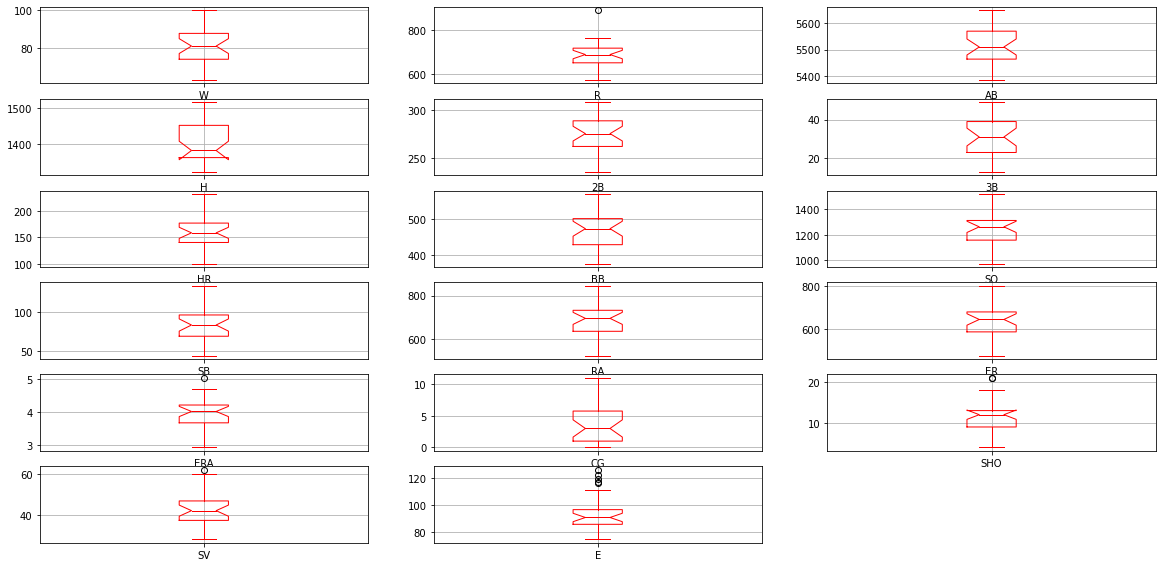

In [12]:
df_baseball.plot(kind='box',subplots=True,layout=(12,3),figsize=(20,20),grid=True,notch=True,color='red',legend=True)

array([[<AxesSubplot:title={'center':'W'}>,
        <AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'AB'}>,
        <AxesSubplot:title={'center':'H'}>,
        <AxesSubplot:title={'center':'2B'}>,
        <AxesSubplot:title={'center':'3B'}>,
        <AxesSubplot:title={'center':'HR'}>],
       [<AxesSubplot:title={'center':'BB'}>,
        <AxesSubplot:title={'center':'SO'}>,
        <AxesSubplot:title={'center':'SB'}>,
        <AxesSubplot:title={'center':'RA'}>,
        <AxesSubplot:title={'center':'ER'}>,
        <AxesSubplot:title={'center':'ERA'}>,
        <AxesSubplot:title={'center':'CG'}>],
       [<AxesSubplot:title={'center':'SHO'}>,
        <AxesSubplot:title={'center':'SV'}>,
        <AxesSubplot:title={'center':'E'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubp

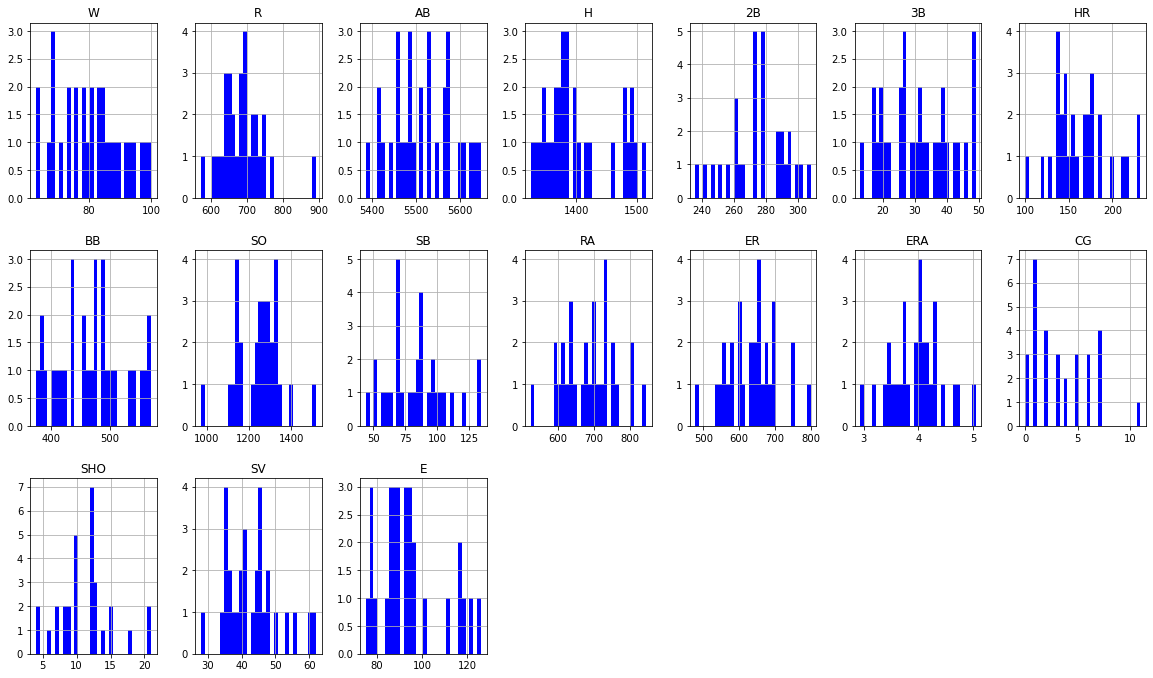

In [13]:
df_baseball.hist(figsize=(20,20),grid=True,layout=(5,7),bins=30,color='blue')

In [14]:
df_baseball.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [15]:
df_baseball.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [16]:
for i in df_baseball.columns:
    if df_baseball.skew().loc[i]>0.55:
        df_baseball[i]=np.log1p(df_baseball[i])

In [17]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_baseball))
z.shape

(30, 17)

In [18]:
df_baseballnew=df_baseball[(z<3).all(axis=1)]
print(df_baseball.shape)
print(df_baseballnew.shape)

(30, 17)
(29, 17)


<AxesSubplot:xlabel='W', ylabel='R'>

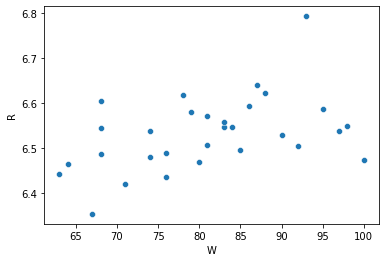

In [19]:
sns.scatterplot(x='W',y='R',data=df_baseball)

<AxesSubplot:xlabel='W', ylabel='AB'>

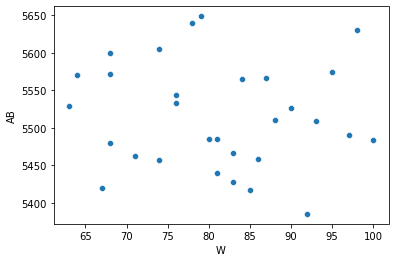

In [20]:
sns.scatterplot(x='W',y='AB',data=df_baseball)

<AxesSubplot:xlabel='W', ylabel='H'>

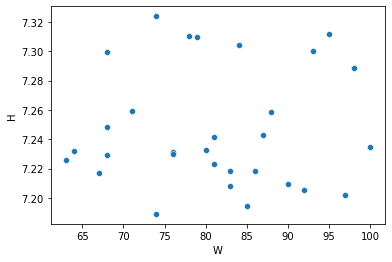

In [21]:
sns.scatterplot(x='W',y='H',data=df_baseball)

<AxesSubplot:xlabel='W', ylabel='2B'>

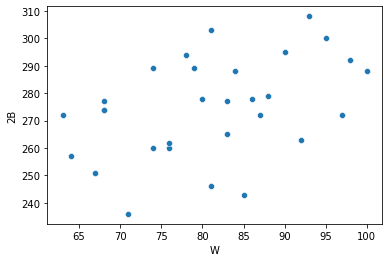

In [22]:
sns.scatterplot(x='W',y='2B',data=df_baseball)

<AxesSubplot:xlabel='W', ylabel='3B'>

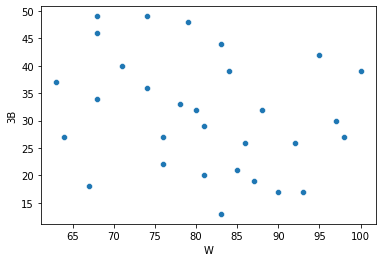

In [23]:
sns.scatterplot(x='W',y='3B',data=df_baseball)

<AxesSubplot:xlabel='W', ylabel='HR'>

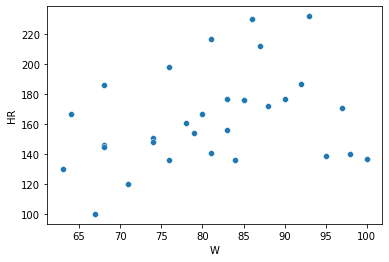

In [24]:
sns.scatterplot(x='W',y='HR',data=df_baseball)

<AxesSubplot:xlabel='W', ylabel='BB'>

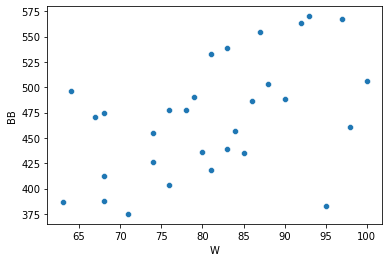

In [25]:
sns.scatterplot(x='W',y='BB',data=df_baseball)

<AxesSubplot:xlabel='W', ylabel='SO'>

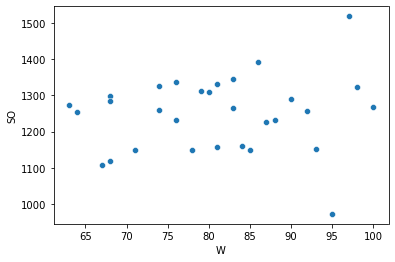

In [26]:
sns.scatterplot(x='W',y='SO',data=df_baseball)

<AxesSubplot:xlabel='W', ylabel='SB'>

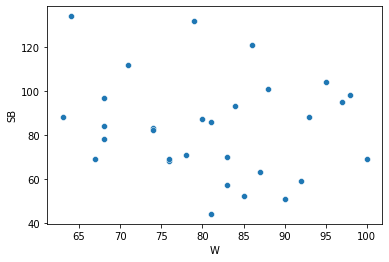

In [27]:
sns.scatterplot(x='W',y='SB',data=df_baseball)

<AxesSubplot:xlabel='W', ylabel='RA'>

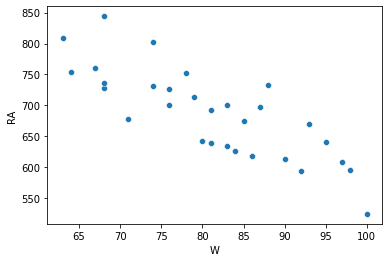

In [28]:
sns.scatterplot(x='W',y='RA',data=df_baseball)

<AxesSubplot:xlabel='W', ylabel='ER'>

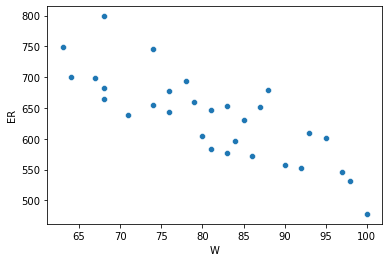

In [29]:
sns.scatterplot(x='W',y='ER',data=df_baseball)

<AxesSubplot:xlabel='W', ylabel='ERA'>

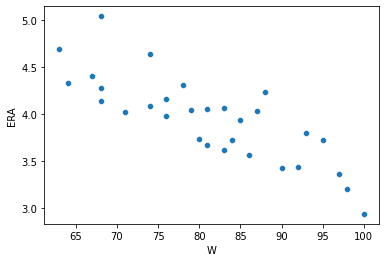

In [30]:
sns.scatterplot(x='W',y='ERA',data=df_baseball)

<AxesSubplot:xlabel='W', ylabel='CG'>

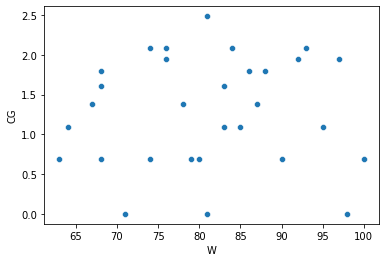

In [31]:
sns.scatterplot(x='W',y='CG',data=df_baseball)

<AxesSubplot:xlabel='W', ylabel='SHO'>

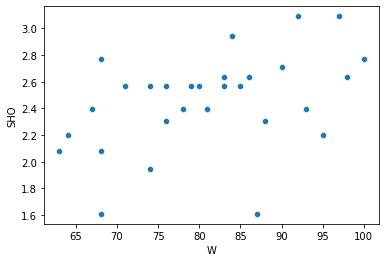

In [32]:
sns.scatterplot(x='W',y='SHO',data=df_baseball)

<AxesSubplot:xlabel='W', ylabel='SV'>

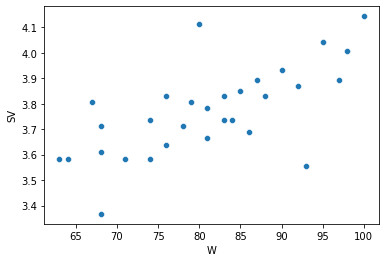

In [33]:
sns.scatterplot(x='W',y='SV',data=df_baseball)

<AxesSubplot:xlabel='W', ylabel='E'>

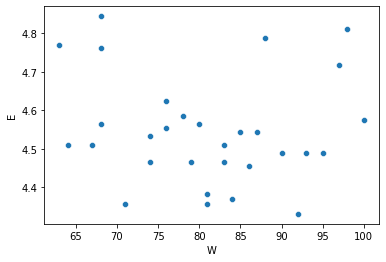

In [34]:
sns.scatterplot(x='W',y='E',data=df_baseball)

array([[<AxesSubplot:title={'center':'W'}>,
        <AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'AB'}>,
        <AxesSubplot:title={'center':'H'}>,
        <AxesSubplot:title={'center':'2B'}>,
        <AxesSubplot:title={'center':'3B'}>,
        <AxesSubplot:title={'center':'HR'}>],
       [<AxesSubplot:title={'center':'BB'}>,
        <AxesSubplot:title={'center':'SO'}>,
        <AxesSubplot:title={'center':'SB'}>,
        <AxesSubplot:title={'center':'RA'}>,
        <AxesSubplot:title={'center':'ER'}>,
        <AxesSubplot:title={'center':'ERA'}>,
        <AxesSubplot:title={'center':'CG'}>],
       [<AxesSubplot:title={'center':'SHO'}>,
        <AxesSubplot:title={'center':'SV'}>,
        <AxesSubplot:title={'center':'E'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubp

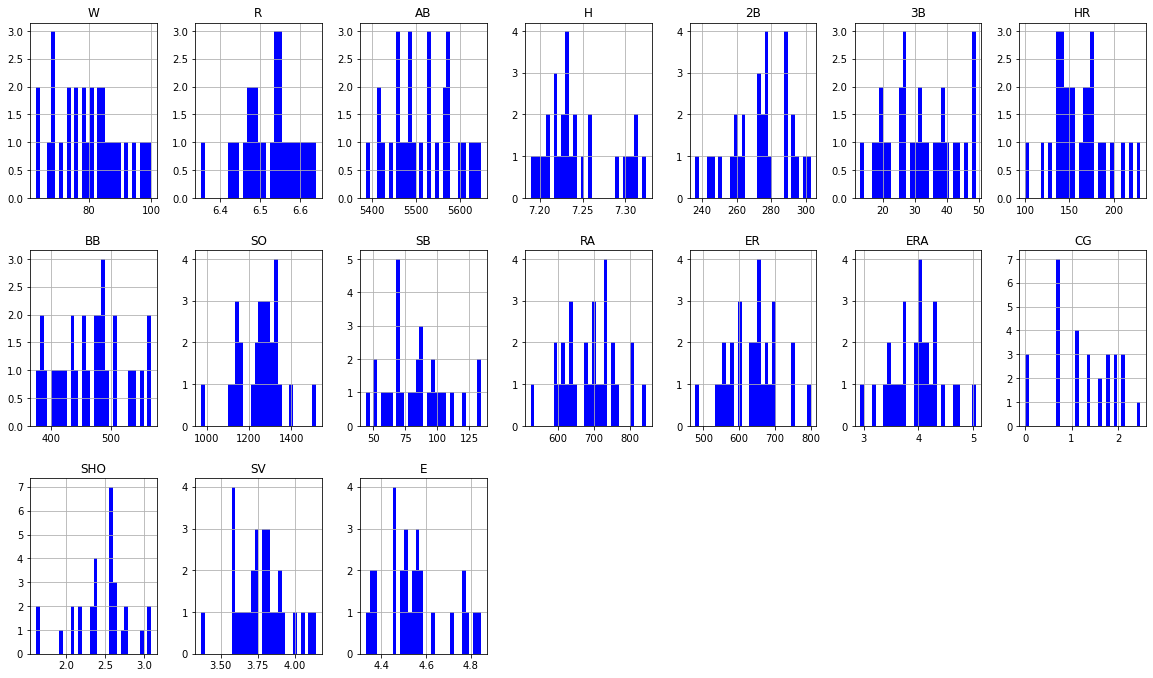

In [35]:
df_baseballnew.hist(figsize=(20,20),grid=True,layout=(5,7),bins=30,color='blue')

In [36]:
x=df_baseballnew.drop("W",axis=1)
y=df_baseballnew["W"]

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.95271901,  0.83008422,  1.72372599,  1.55653766,  1.01084549,
        -0.76586314, -1.53635899, -2.72762331,  0.9059529 , -0.66451353,
        -0.51114812, -0.51138828, -0.24041455, -0.72241314,  1.55481209,
        -0.43573324],
       [ 0.35665907, -0.70283074, -0.94984589,  0.20117132,  1.20891656,
        -0.18138864, -0.49502051,  0.12189552, -0.58531515,  0.15463823,
         0.23216082,  0.23895226, -0.24041455,  0.31208451,  0.29622875,
        -0.59810993],
       [-0.24123892, -1.10025314, -0.08870013,  1.73332457, -0.2766165 ,
        -0.69710144,  1.25294051, -0.9258657 ,  0.11645805, -0.67839746,
        -0.75415297, -0.64380131,  1.81571095, -0.15787854, -0.67278738,
        -1.19738162],
       [-1.34193161,  0.23395062, -0.34774692, -0.8006212 , -0.47468758,
        -0.8690057 , -1.14585706, -0.20124579, -0.6730368 ,  0.16852216,
         0.08921679,  0.04033271,  1.21433279, -0.42600884, -0.82526317,
         0.53829069],
       [ 0.20390224,  1.25589393,  2

In [62]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import explained_variance_score,r2_score,mean_tweedie_deviance
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
maxScore=0
maxRs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    predlm=lm.predict(x_test)
    sc=lm.score(x_train,y_train)
    if sc>maxScore:
        maxScore=sc
        maxRs=i
print("Best Accuracy is ", maxScore,"on Random_State",maxRs)

Best Accuracy is  0.9935725844050264 on Random_State 107


In [64]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=107)

In [65]:
x_train.shape

(23, 16)

In [66]:
y_train.shape

(23,)

In [67]:
x_test.shape

(6, 16)

In [68]:
y_test.shape

(6,)

In [69]:
model = [Ridge(alpha=.4),LinearRegression(),Lasso(),DecisionTreeRegressor(max_depth=15,min_samples_leaf=100),RandomForestRegressor(n_estimators=500,max_depth=6,min_samples_leaf=50,n_jobs=4)]

In [79]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('score = \n',m,'is :')
    print(explained_variance_score(y_test,predm))
    print(r2_score(y_test,predm))
    print(mean_tweedie_deviance(y_test,predm))

score = 
 Ridge(alpha=0.4) is :
0.6624678418502261
0.6559655378052262
27.723443745195524
score = 
 LinearRegression() is :
0.6794521195307748
0.6789363062718956
25.872382652923076
score = 
 Lasso() is :
0.8450822601203325
0.8072405491414436
15.533199081685332
score = 
 DecisionTreeRegressor(max_depth=15, min_samples_leaf=100) is :
0.0
-0.9524653841417046
157.3361688720857
score = 
 RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_estimators=500,
                      n_jobs=4) is :
0.0
-0.9779124478528827
159.38677808947813


In [86]:
lm.score(x_train,y_train)

0.9533529121130606

In [81]:
m.score(x_train,y_train)

-0.0001432346955132502

In [82]:
#predict the value
pred=m.predict(x_test)
print("Predicted wins:",pred)
print("Actual wins",y_test)

Predicted wins: [78.62286957 78.62286957 78.62286957 78.62286957 78.62286957 78.62286957]
Actual wins 16     98
13     76
27     79
26     84
15    100
10     88
Name: W, dtype: int64


In [83]:
pred=lm.predict(x_test)
print("Predicted wins:",pred)
print("Actual wins",y_test)

Predicted wins: [91.56824627 80.0477769  83.21833264 90.08994    94.80908186 84.04335856]
Actual wins 16     98
13     76
27     79
26     84
15    100
10     88
Name: W, dtype: int64


In [73]:
import joblib
joblib.dump(m,"baseballcasestudy.obj")

['baseballcasestudy.obj']